# ML model trainning

import all library 

In [1]:
import pandas as pd
import sklearn
import itertools
import numpy as np
import seaborn as sb
import re
import nltk
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib import pyplot as plt
from sklearn.linear_model import PassiveAggressiveClassifier
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

Read the datasets

In [2]:
df = pd.read_csv('news.csv')
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


we are using here only one feature from datasets

In [3]:
labels = df.label

In [4]:
labels = labels.map({'FAKE':0, 'REAL':1})

In [5]:
labels

0       0
1       0
2       1
3       0
4       1
       ..
6330    1
6331    0
6332    0
6333    1
6334    1
Name: label, Length: 6335, dtype: int64

Mapping the Fake and Real label as 0 and 1 because of binary classification

In [6]:
lemmatizer = WordNetLemmatizer()
stpwrds = list(stopwords.words('english'))

In [7]:
for i in range(len(df)):
    corpus = []
    review = df['text'][i]
    review = re.sub(r'[^a-zA-Z\s]', '', review)
    review = review.lower()
    review = nltk.word_tokenize(review)
    for j in review:
        if j not in stpwrds:
            corpus.append(lemmatizer.lemmatize(j))
    review = ' '.join(corpus)
    df['text'][i] = review

C:\Users\vishw\AppData\Local\Temp/ipykernel_9168/2348363969.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'][i] = review


In [8]:
tfidf_v = TfidfVectorizer(max_features=5000, ngram_range=(1,3))
X = tfidf_v.fit_transform(df['text'])

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, labels, test_size=0.3, random_state=1)

In [10]:
X_train.shape

(4434, 5000)

In [12]:
X_test.shape

(1901, 5000)

In [13]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [14]:
classifier = PassiveAggressiveClassifier()
classifier.fit(X_train,Y_train)

PassiveAggressiveClassifier()

In [15]:
classifier.predict(X_test)

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [16]:
Y_test.iloc[1]

0

accuracy:   0.918
Confusion matrix, without normalization


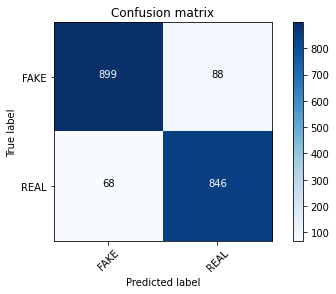

In [17]:
pred = classifier.predict(X_test)
score = metrics.accuracy_score(Y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(Y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [18]:
pickle.dump(classifier,open('./model.pkl', 'wb'))
pickle.dump(tfidf_v, open('./tfidf.pkl','wb'))

In [19]:
loaded_model = pickle.load(open('./model.pkl', 'rb'))
loaded_tfidf = pickle.load(open('./tfidf.pkl','rb'))

In [20]:
def fake_news_det(news):
    review = news
    review = re.sub(r'[^a-zA-Z\s]', '', review)
    review = review.lower()
    review = nltk.word_tokenize(review)
    for y in review :
        if y not in stpwrds :
            corpus.append(lemmatizer.lemmatize(y))     
    input_data = [' '.join(corpus)]
    vectorized_input_data = loaded_tfidf.transform(input_data)
    prediction = loaded_model.predict(vectorized_input_data)
    print(prediction)
    if prediction[0] == 0:
        print("Prediction of the News :  Looking Fake⚠ News������ ")
    else:
        print("Prediction of the News : Looking Real News������ ")

In [21]:
n = "The Trump campaign has confirmed to Hannity.com that Mr. Trump did indeed send his plane to make two trips from North Carolina to Miami, Florida to transport over 200 Gulf War Marines back home"

In [22]:
fake_news_det(n)

[1]


In [23]:
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,daniel greenfield shillman journalism fellow f...,FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,google pinterest digg linkedin reddit stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,u secretary state john f kerry said monday sto...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,kaydee king kaydeeking november lesson tonight...,FAKE
4,875,The Battle of New York: Why This Primary Matters,primary day new york frontrunners hillary clin...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,state department told republican national comm...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,p pb stand plutocratic pentagon posted oct wik...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,antitrump protester tool oligarchy reform alwa...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...",addis ababa ethiopia president obama convened ...,REAL


In [24]:
fake_news_det(df['text'][2])

[1]


# Web Scrapping

In [1]:
from bs4 import BeautifulSoup as Bsoup
import requests

In [2]:
def scrape(request):
    session = requests.Session()
    session.headers = {"User-Agent": "Googlebot/2.1 (+http://www.google.com/bot.html)"}
    url = "https://www.theonion.com/"

    content = session.get(url, verify=False).content
    soup = BSoup(content, "html.parser")
    News = soup.find_all('div', {"class":"curation-module__item"})
    for artcile in News:
        main = artcile.find_all('a')[0]
        link = main['href']
        image_src = str(main.find('img')['srcset']).split(" ")[-4]
        title = main['title']
        new_headline = Headline()
        new_headline.title = title
        new_headline.url = link
        new_headline.image = image_src
        new_headline.save()
    return redirect("../")

In [2]:
session = requests.Session()
session.headers = {"User-Agent": "Googlebot/2.1 (+http://www.google.com/bot.html)"}
url = "https://www.news18.com/india/"
content = session.get(url, verify=False).content
soup = Bsoup(content, "html.parser")

C:\Users\vishw\AppData\Local\Programs\Python\Python39\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.news18.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [6]:
News = soup.find_all('div', {"class":"jsx-3621759782 blog_list_row"})
News

[<div class="jsx-3621759782 blog_list_row"><a class="jsx-3621759782" href="https://www.news18.com/news/india/police-army-joint-operation-recover-huge-cache-of-arms-ammunition-in-jks-uri-6688855.html"><figure class="jsx-3621759782"><div class="jsx-3621759782 blog_img"><div class="News"></div><img alt="Police-Army Joint Operation Recover Huge Cache of Arms, Ammunition in J&amp;K's Uri" class="jsx-3621759782 lazyload" data-src="https://images.news18.com/ibnlive/uploads/2022/12/arms-ammunition111-1-16718954693x2.jpg?impolicy=website&amp;width=219&amp;height=147" src="https://images.news18.com/static_news18/pix/ibnhome/news18/images/default-218x145.jpg?impolicy=website&amp;width=219&amp;height=147" title="Police-Army Joint Operation Recover Huge Cache of Arms, Ammunition in J&amp;K's Uri"/></div><figcaption class="jsx-3621759782"><div class="jsx-3621759782 blog_title"><h4 class="jsx-3621759782">Police-Army Joint Operation Recover Huge Cache of Arms, Ammunition in J&amp;K's Uri</h4></div></f

In [7]:
link = News[0].find('a')['href']
link

'https://www.news18.com/news/india/police-army-joint-operation-recover-huge-cache-of-arms-ammunition-in-jks-uri-6688855.html'

In [9]:
headline = News[0].h4.text
headline

"Police-Army Joint Operation Recover Huge Cache of Arms, Ammunition in J&K's Uri"

In [11]:
img = News[1].find("div",{"class":"jsx-3621759782 blog_img"}).find('img')['data-src']
img

'https://images.news18.com/ibnlive/uploads/2022/12/reuters-fiji-rabuka-16716276093x2.jpg?impolicy=website&width=219&height=147'

In [8]:
"https://images.news18.com/ibnlive/uploads/2022/07/admin-ajax-e1657080846168.jpg?impolicy=website&width=219&height=147"

'https://images.news18.com/ibnlive/uploads/2022/07/admin-ajax-e1657080846168.jpg?impolicy=website&width=219&height=147'

### for Sports

In [35]:
session = requests.Session()
session.headers = {"User-Agent": "Googlebot/2.1 (+http://www.google.com/bot.html)"}
url = "https://zeenews.india.com/cricket/t20-world-cup"
content = session.get(url, verify=False).content
soup = Bsoup(content, "html.parser")

C:\Users\vishw\AppData\Local\Programs\Python\Python39\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'zeenews.india.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [38]:
News = soup.find_all('div', {"class":"news_item"})

In [47]:
img = News[0].find('div',{"class":"news_right"}).find('img')['src']

In [67]:
link = News[0].find('div',{"class":"news_left"}).find('div',{"class":"news_title"}).find('a')['href']

In [69]:
link = 'https://zeenews.india.com'+link

In [75]:
headline = News[0].find('div',{"class":"news_left"}).find('div',{"class":"news_title"}).text

In [76]:
headline

"Taal Thok Ke: Team India's X-ray on defeat in T20 World Cup "

### for business

In [2]:
session = requests.Session()
session.headers = {"User-Agent": "Googlebot/2.1 (+http://www.google.com/bot.html)"}
url = "https://zeenews.india.com/business"
content = session.get(url, verify=False).content
soup = Bsoup(content, "html.parser")

C:\Users\vishw\AppData\Local\Programs\Python\Python39\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'zeenews.india.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [24]:
news = soup.find('div',{"class":"more-news-section"})
News = news.find_all('div', {"class":"row no-gutters morenews-block"})

In [25]:
link = News[0].find('div',{"class":"col-lg-3 col-12 pl-0"}).find('a')['href']

In [26]:
imge = News[0].find('div',{"class":"col-lg-3 col-12 pl-0"}).find('img')['src']

In [27]:
head = News[0].find('div',{"class":"col-md-9 pl-4"}).find('div',{"class":"news_description desc-title morenews-title"}).text

In [28]:
headline = []
for i in News:
    link = i.find('div',{"class":"col-lg-3 col-12 pl-0"}).find('a')['href']
    imge = i.find('div',{"class":"col-lg-3 col-12 pl-0"}).find('img')['src']
    head = i.find('div',{"class":"col-md-9 pl-4"}).find('div',{"class":"news_description desc-title morenews-title"}).text
    headline.append([link,imge,head])
    
    

In [29]:
len(headline)

12

### for world news

In [12]:
session = requests.Session()
session.headers = {"User-Agent": "Googlebot/2.1 (+http://www.google.com/bot.html)"}
url = "https://www.news18.com/world/"
content = session.get(url, verify=False).content
soup = Bsoup(content, "html.parser")

C:\Users\vishw\AppData\Local\Programs\Python\Python39\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.news18.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [13]:
News = soup.find_all('div', {"class":"jsx-3621759782 blog_list_row"})

In [14]:
link = News[0].find('a')['href']
link

'https://www.news18.com/videos/world/smartphones-to-track-nervous-wagner-recruits-on-the-ukraine-battlefield-drones-to-execute-deserters-6688933.html'

In [15]:
headline = News[0].h4.text
headline

'Smartphones To Track Nervous Wagner Recruits On The Ukraine Battlefield, Drones To Execute Deserters'

In [17]:
img = News[1].find("div",{"class":"jsx-3621759782 blog_img"}).find('img')['data-src']
img

'https://images.news18.com/ibnlive/uploads/2022/12/1671895344_f895cb70-91fc-49b0-814a-00a3ecb5bfa5.jpeg?impolicy=website&width=219&height=147'

### for politics news

In [36]:
session = requests.Session()
session.headers = {"User-Agent": "Googlebot/2.1 (+http://www.google.com/bot.html)"}
url = "https://www.news18.com/politics/"
content = session.get(url, verify=False).content
soup = Bsoup(content, "html.parser")

C:\Users\vishw\AppData\Local\Programs\Python\Python39\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.news18.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [37]:
News = soup.find_all('div', {"class":"jsx-3328680553 blog_list_row"})

In [38]:
link = News[0].find('a')['href']
link

'https://www.news18.com/videos/politics/mangaluru-blast-probe-who-allowed-terror-nexus-to-thrive-newsepicentre-english-news-6447151.html'

In [39]:
headline = News[0].h4.text
headline

'Mangaluru Blast Probe | Who Allowed Terror Nexus To Thrive? | NewsEpicentre | English News'

In [40]:
img = News[1].find("div",{"class":"jsx-3328680553 blog_img"}).find('img')['data-src']
img

'https://images.news18.com/ibnlive/uploads/2022/10/voting-16657423903x2.jpeg?impolicy=website&width=219&height=147'